In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import date
from optimisation_utiles import * 
df = pd.read_csv('ARP_Returns.csv')
df_return = cal_return(df)
# My weekly change
df_weekly = df_return.resample('W-FRI').apply(lambda x: (1+x).prod()-1)

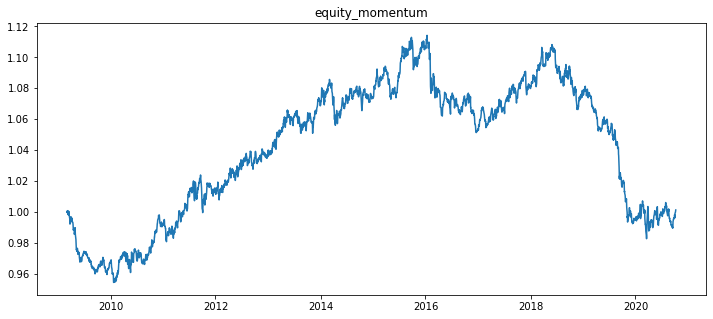

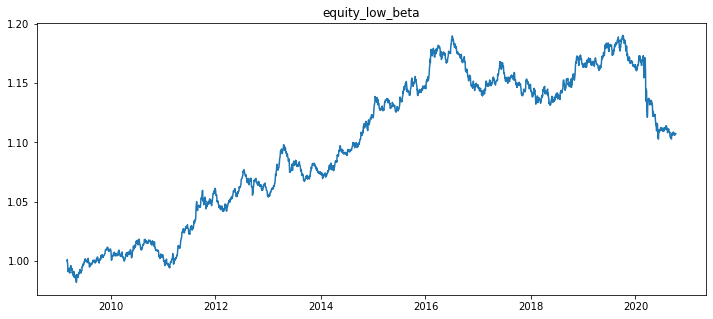

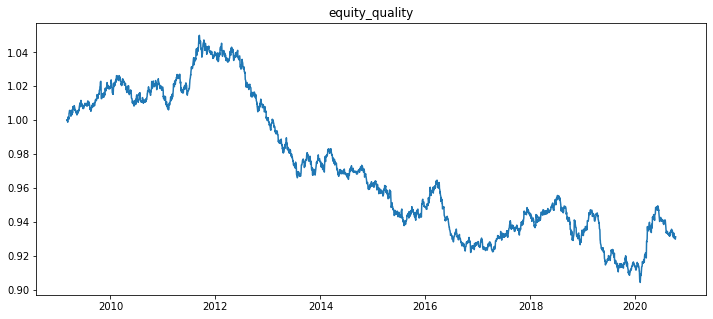

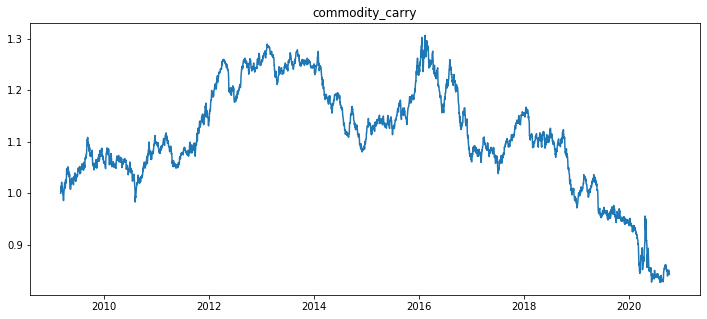

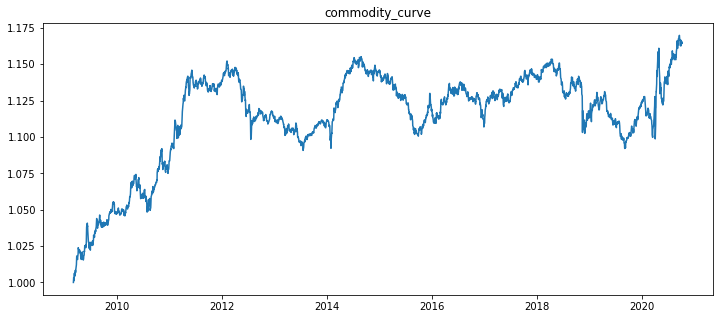

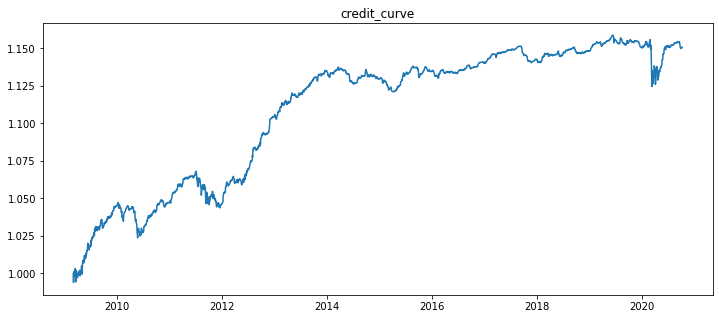

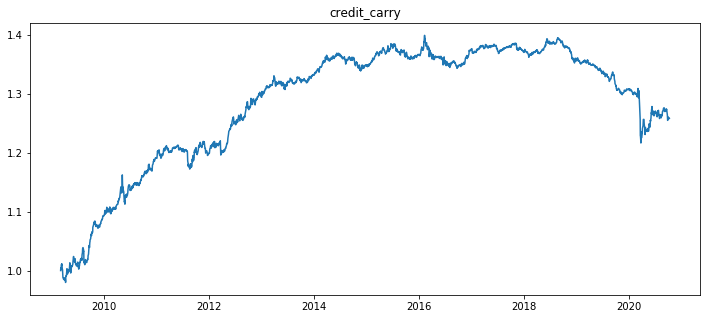

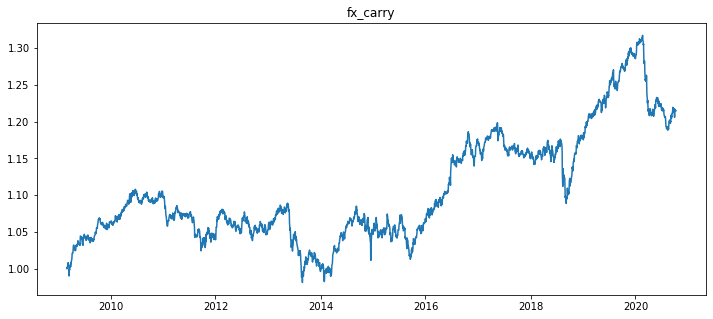

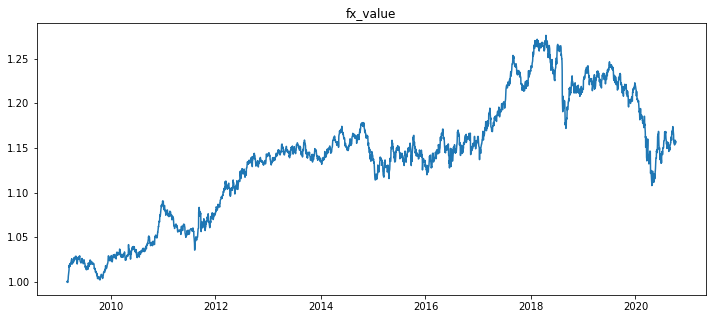

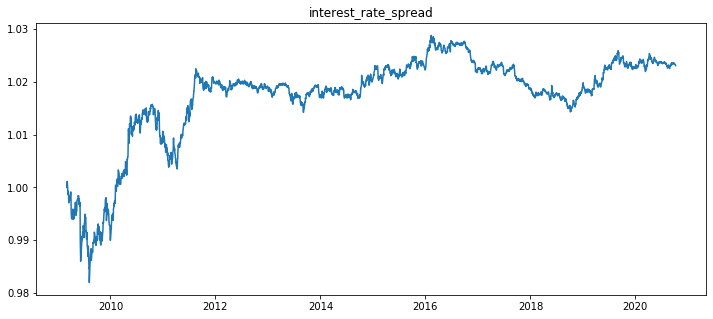

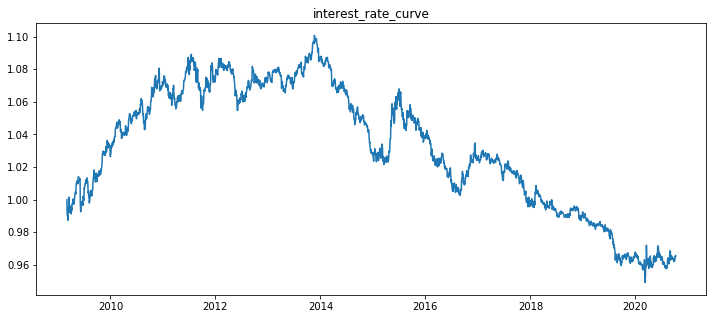

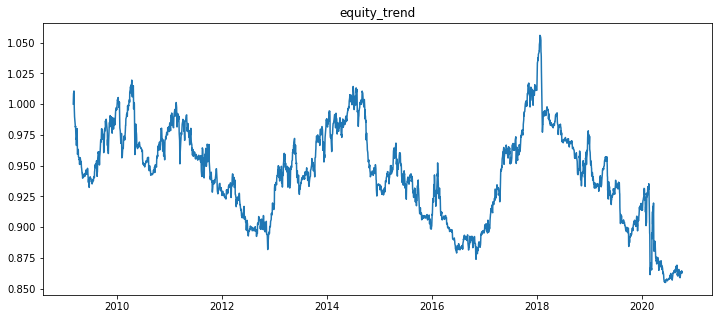

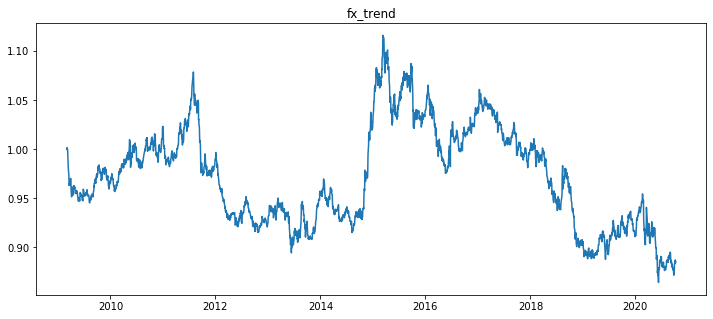

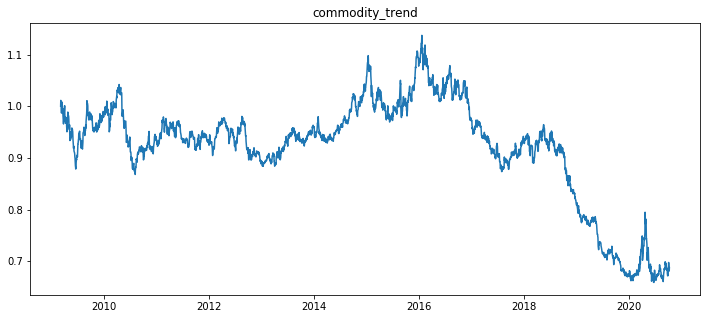

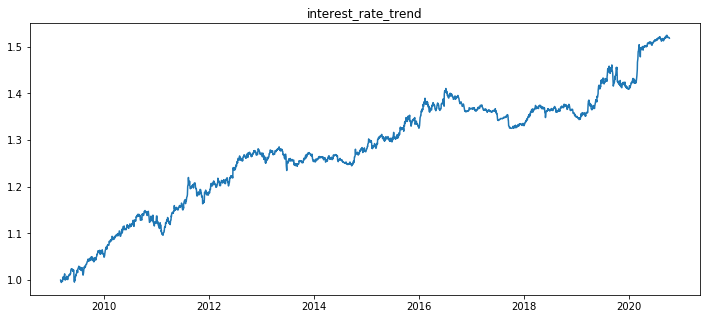

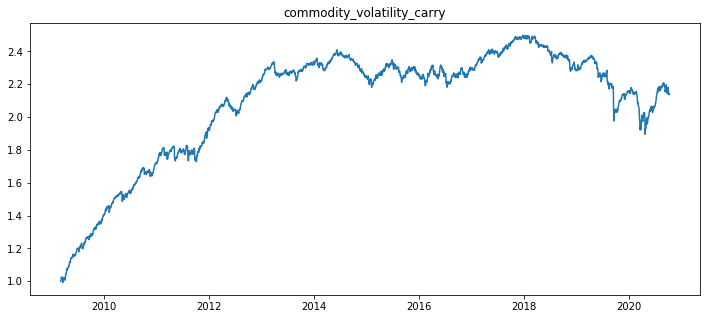

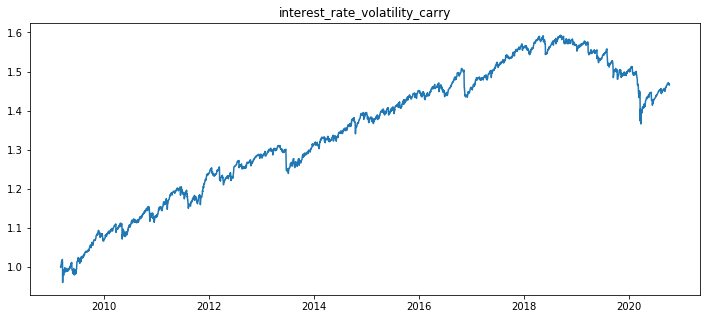

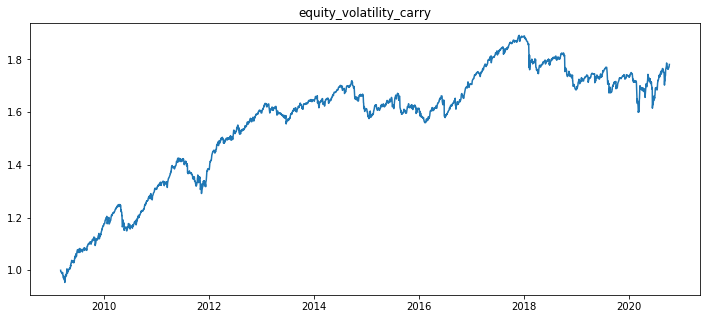

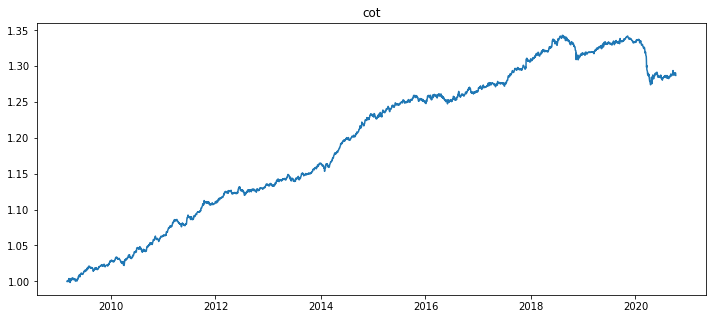

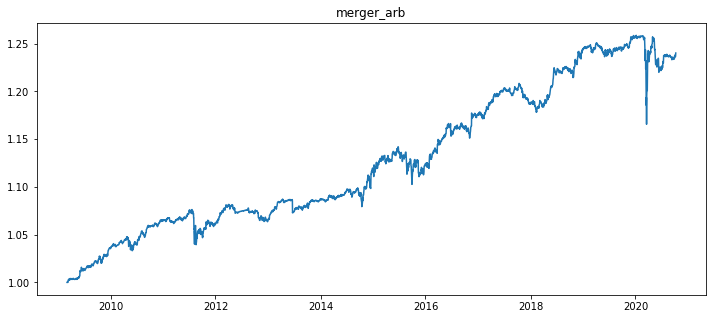

In [2]:
for strategy in df_return.columns:
    plt.figure(figsize=(12,5))
    plt.plot((1+df_return[strategy]).cumprod())
    plt.title(strategy)

In [59]:
df_weekly = df_weekly[df_weekly.index>'2009-09-01']

In [60]:
%%time
div_results = rolling_portfolio_optimisation(df_return=df_weekly, default_upper_bound=0.1, default_lower_bound=0, window_size=36, optimisation_freq=12, target='diversification_ratio', input_bounds=None)
input_bounds_max_sharpe = Duncans_weights(df_weekly, div_results)

2009-09-27 ---- 2012-09-28
2010-09-26 ---- 2013-09-29
2011-09-30 ---- 2014-09-28
2012-09-28 ---- 2015-09-27
2013-09-29 ---- 2016-09-30
2014-09-28 ---- 2017-09-29
2015-09-27 ---- 2018-09-28
2016-09-30 ---- 2019-09-29
2017-09-29 ---- 2020-09-27
2012-09-28
2013-09-29
2014-09-28
2015-09-27
2016-09-30
2017-09-29
2018-09-28
2019-09-29
2020-09-27
Wall time: 5.94 s


In [61]:
# cap vol carry at 0.3
for date in input_bounds_max_sharpe:
    input_bounds_max_sharpe[date]['interest_rate_volatility_carry'] = [0, 0.03]
    input_bounds_max_sharpe[date]['commodity_volatility_carry'] = [0, 0.03]
    input_bounds_max_sharpe[date]['equity_volatility_carry'] = [0, 0.03]

In [62]:
sharpe_results = rolling_portfolio_optimisation(df_return=df_weekly, default_upper_bound=1, default_lower_bound=0, window_size=36, optimisation_freq=12, target='sharpe_ratio', input_bounds=input_bounds_max_sharpe)
df_component_weights_s, df_weights_s = generate_component_weights(df_weekly, sharpe_results)
df_component_weights_d, df_weights_d = generate_component_weights(df_weekly, div_results)

2009-09-27 ---- 2012-09-28
2010-09-26 ---- 2013-09-29
2011-09-30 ---- 2014-09-28
2012-09-28 ---- 2015-09-27
2013-09-29 ---- 2016-09-30
2014-09-28 ---- 2017-09-29
2015-09-27 ---- 2018-09-28
2016-09-30 ---- 2019-09-29
2017-09-29 ---- 2020-09-27


In [64]:
# writer = pd.ExcelWriter('weights_remove_3.xlsx')
# df_weights_d.to_excel(writer, sheet_name='max_div')
# df_weights_s.to_excel(writer, sheet_name='max_sharpe')
# writer.save()

In [49]:
writer.save()

In [65]:
from PortfolioPerformance import * 
rebalance_results_s = Get_Portfolio_Index_Base_Case(df_return, df_component_weights_s, initial_notional=1)
rebalance_results_d = Get_Portfolio_Index_Base_Case(df_return, df_component_weights_d, initial_notional=1)

2016-12-08 00:00:00
2016-12-09 00:00:00
2016-12-12 00:00:00
2016-12-13 00:00:00
2016-12-14 00:00:00
2016-12-15 00:00:00
2016-12-16 00:00:00
2016-12-19 00:00:00
2016-12-20 00:00:00
2016-12-21 00:00:00
2016-12-22 00:00:00
2016-12-23 00:00:00
2016-12-26 00:00:00
2016-12-27 00:00:00
2016-12-28 00:00:00
2016-12-29 00:00:00
2016-12-30 00:00:00
2017-01-02 00:00:00
2017-01-03 00:00:00
2017-01-04 00:00:00
2017-01-05 00:00:00
2017-01-06 00:00:00
2017-01-09 00:00:00
2017-01-10 00:00:00
2017-01-11 00:00:00
2017-01-12 00:00:00
2017-01-13 00:00:00
2017-01-16 00:00:00
2017-01-17 00:00:00
2017-01-18 00:00:00
2017-01-19 00:00:00
2017-01-20 00:00:00
2017-01-23 00:00:00
2017-01-24 00:00:00
2017-01-25 00:00:00
2017-01-26 00:00:00
2017-01-27 00:00:00
2017-01-30 00:00:00
2017-01-31 00:00:00
2017-02-01 00:00:00
2017-02-02 00:00:00
2017-02-03 00:00:00
2017-02-06 00:00:00
2017-02-07 00:00:00
2017-02-08 00:00:00
2017-02-09 00:00:00
2017-02-10 00:00:00
2017-02-13 00:00:00
2017-02-14 00:00:00
2017-02-15 00:00:00


In [66]:
df_component_return_s = rebalance_results_s['PnL_df_net']
df_component_return_s = df_component_return_s[(df_component_return_s.index >= '2012-09-29')]
df_component_return_d = rebalance_results_d['PnL_df_net']
df_component_return_d = df_component_return_d[(df_component_return_d.index >= '2012-09-29')]

In [67]:
results_d = get_portfolio_stats((1+df_component_return_d).cumprod())
results_s = get_portfolio_stats((1+df_component_return_s).cumprod())

In [68]:
results_d

{'volatility': 0.007678632731869262,
 'return': 0.003224082490654846,
 'sharpe': 0.4198771582437679,
 'diversification_ratio': 3.5631367719041624,
 'marginal_risk_contribution': array([3.45647532e-04, 6.91772461e-04, 4.52286240e-04, 8.59300622e-04,
        2.90681867e-04, 5.48687723e-04, 2.72651804e-04, 4.21956026e-05,
        2.13361841e-04, 1.61804540e-04, 3.07184486e-04, 8.06966980e-04,
        2.25269107e-04, 2.54183272e-04, 1.40086435e-04, 4.93136362e-04,
        3.89313532e-04, 1.18410233e-03]),
 'component_risk_contribution': array([3.45647532e-04, 6.91772461e-04, 4.52286240e-04, 8.59300622e-04,
        2.90681867e-04, 5.48687723e-04, 2.72651804e-04, 4.21956026e-05,
        2.13361841e-04, 1.61804540e-04, 3.07184486e-04, 8.06966980e-04,
        2.25269107e-04, 2.54183272e-04, 1.40086435e-04, 4.93136362e-04,
        3.89313532e-04, 1.18410233e-03]),
 'component_risk_contribution_pct': array([0.0450142 , 0.09009058, 0.05890192, 0.11190802, 0.03785594,
        0.07145644, 0.0355078

In [69]:
results_s 

{'volatility': 0.007638009068387215,
 'return': 0.004393509730478815,
 'sharpe': 0.5752166161549892,
 'diversification_ratio': 3.5771179169794145,
 'marginal_risk_contribution': array([ 3.72118669e-04,  6.86892193e-04,  3.29360528e-04,  8.15334767e-04,
         2.90529189e-04,  6.44199509e-04,  4.20397646e-04,  5.72862116e-05,
         1.21432447e-04, -4.03193176e-05,  2.40508563e-04,  5.11108975e-04,
         3.63197569e-04,  2.38526846e-04,  3.74462150e-04,  4.87292666e-04,
         4.57626976e-04,  1.26805348e-03]),
 'component_risk_contribution': array([ 3.72118669e-04,  6.86892193e-04,  3.29360528e-04,  8.15334767e-04,
         2.90529189e-04,  6.44199509e-04,  4.20397646e-04,  5.72862116e-05,
         1.21432447e-04, -4.03193176e-05,  2.40508563e-04,  5.11108975e-04,
         3.63197569e-04,  2.38526846e-04,  3.74462150e-04,  4.87292666e-04,
         4.57626976e-04,  1.26805348e-03]),
 'component_risk_contribution_pct': array([ 0.04871933,  0.08993079,  0.04312125,  0.10674703,  

In [70]:
def return_risk(results):
    risk_df = pd.DataFrame()
    risk_df['risk_contribution'] = results['component_risk_contribution']
    risk_df['risk_contribution_pct'] = results['component_risk_contribution_pct']
    risk_df['return_contribution'] = results['component_total_return_contribution'].values
    risk_df.index = results['component_total_return_contribution'].index
    return risk_df.T

risk_df_s = return_risk(results_s)
risk_df_d = return_risk(results_d)

In [71]:
writer = pd.ExcelWriter('remove_2_weights.xlsx', engine='xlsxwriter')
risk_df_s.to_excel(writer, sheet_name='sharpe')
risk_df_d.to_excel(writer, sheet_name='div')
writer.save()